In [1]:
import os.path as path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Dependencies and Setup

# File to Load (Remember to change these)
city_file = path.join("data", "city_data.csv")
ride_file = path.join("data", "ride_data.csv")

# Read the City and Ride Data
city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

# Combine the data into a single dataset
pyber_df = pd.merge(city_df, ride_df, on="city", how="inner")

# Display the data table for preview
pyber_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
averages_df = pyber_df.groupby(["city"], as_index=False).mean()

averages_df["ride_count"] = pyber_df.groupby(["city"])\
    .count()["ride_id"].tolist()

averages_df["driver_count"] = pyber_df.groupby(["city"])\
    .median()["driver_count"].tolist()

averages_df["city_type"] = pyber_df.groupby(["city"])\
    .first()["type"].tolist()

averages_df["city_type"].replace(to_replace=["Urban", "Suburban", "Rural"],
                                 inplace=True,
                                 value=[0, 1, 2])

averages_df.drop(labels=["ride_id"], axis=1, inplace=True)

averages_df["fare"] = averages_df["fare"].round(2)

averages_df.head()


,city,driver_count,fare,ride_count,city_type
0,Amandaburgh,12.0,24.64,18,0
1,Barajasview,26.0,25.33,22,0
2,Barronchester,11.0,36.42,16,1
3,Bethanyland,22.0,32.96,18,1
4,Bradshawfurt,7.0,40.06,10,2


 ## Bubble Plot of Ride Sharing Data

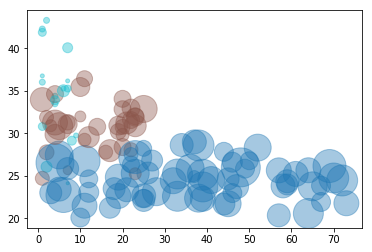

In [3]:
# Obtain the x and y coordinates for each of the three city types
x = averages_df["driver_count"]
y = averages_df["fare"]
s = [n**2 for n in averages_df["ride_count"]]
city_pop = averages_df["city_type"]
colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255]]
# Build the scatter plots for each city types
plt.scatter(x, y, s=s, c=city_pop, alpha=0.4, cmap="tab10")
plt.show()

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure



In [4]:
# Show plot
plt.show()


 ## Total Fares by City Type

In [5]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure



In [6]:
# Show Figure
plt.show()


 ## Total Rides by City Type

In [7]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure



In [8]:
# Show Figure
plt.show()


 ## Total Drivers by City Type

In [9]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure



In [10]:
# Show Figure
plt.show()

